In [1]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


In [2]:
df = pd.read_csv('/kaggle/input/twitter-tweets-sentiment-dataset/Tweets.csv')
df.head()


,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [3]:
# Convert text to lowercase
df['text'] = df['text'].str.lower()

df['text'] = df['text'].astype(str)  # Convert 'text' column to string data type

df['tokens'] = df['text'].apply(nltk.word_tokenize)  # Tokenization


# Remove stopwords
stopwords = nltk.corpus.stopwords.words('english')
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stopwords])




In [4]:
X = df['text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)


In [6]:
model = SVC()
model.fit(X_train_vectors, y_train)


SVC()

In [7]:
y_pred = model.predict(X_test_vectors)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

    negative       0.77      0.57      0.66      1562
     neutral       0.62      0.81      0.70      2230
    positive       0.80      0.68      0.73      1705

    accuracy                           0.70      5497
   macro avg       0.73      0.68      0.70      5497
weighted avg       0.72      0.70      0.70      5497

Accuracy Score: 0.698744769874477


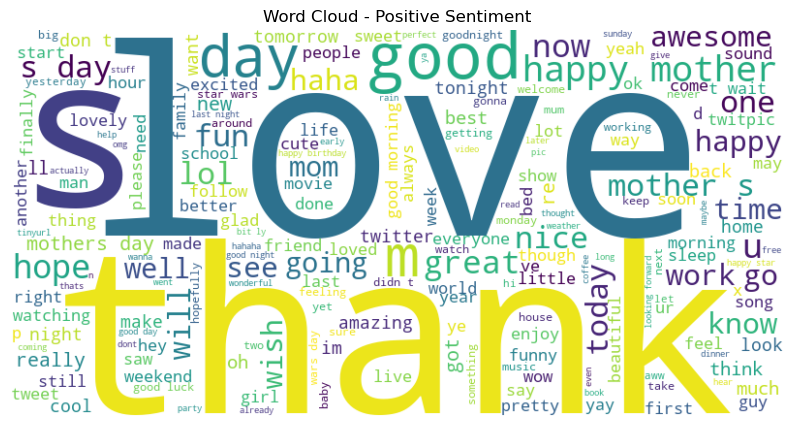

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Extract the text from positive sentiment tweets
positive_tweets = df[df['sentiment'] == 'positive']['text']

# Concatenate all the positive sentiment tweets into a single string
positive_text = ' '.join(positive_tweets)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Sentiment')
plt.show()


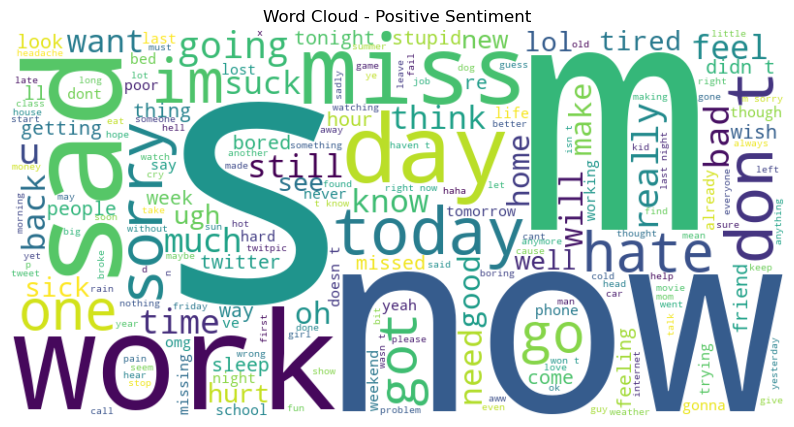

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Extract the text from positive sentiment tweets
positive_tweets = df[df['sentiment'] == 'negative']['text']

# Concatenate all the positive sentiment tweets into a single string
positive_text = ' '.join(positive_tweets)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Sentiment')
plt.show()

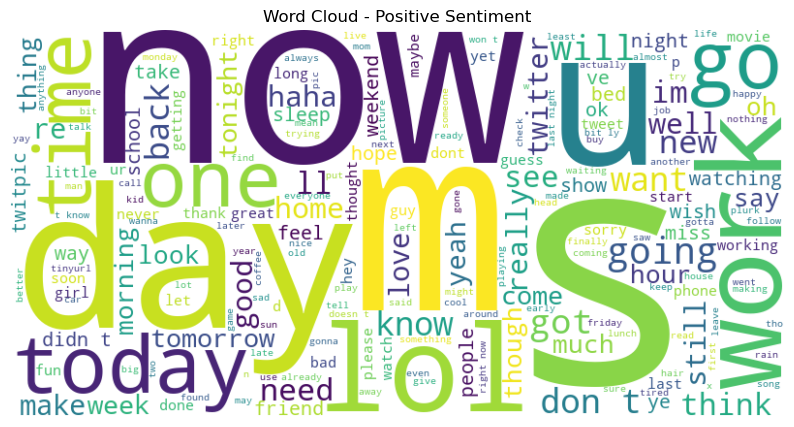

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Extract the text from positive sentiment tweets
positive_tweets = df[df['sentiment'] == 'neutral']['text']

# Concatenate all the positive sentiment tweets into a single string
positive_text = ' '.join(positive_tweets)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Sentiment')
plt.show()